In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv("E:\Machine Learning\Data Sets/Dhaka Rent.csv", sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [56]:
df.shape

(60, 2)

In [57]:
df.area.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [58]:
x = df['area']
y = df['rent']

In [59]:
x.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [60]:
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

# **sklearn**

In [61]:
from sklearn.linear_model import LinearRegression 

In [62]:
reg = LinearRegression()

In [63]:
reg.fit(df[['area']], y)

LinearRegression()

In [64]:
reg.coef_

array([21.29266147])

In [65]:
reg.intercept_

np.float64(-11469.735446431114)

In [66]:
reg.predict([[2000]])

array([31115.58750079])

Text(0.5, 1.0, 'area-rent visualization')

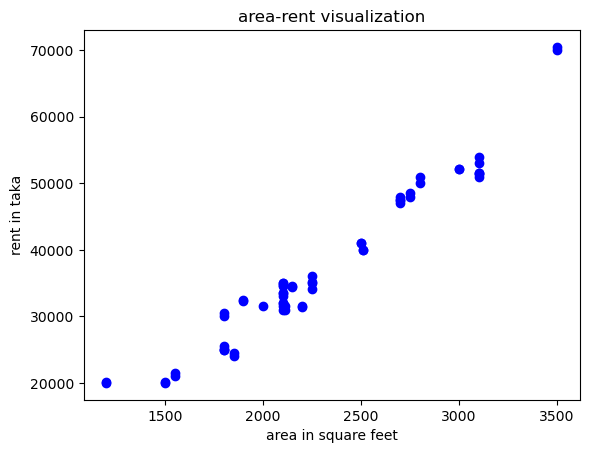

In [67]:
plt.scatter(x, y, color='blue') 
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')

# **train-test split**

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x = df.drop('rent', axis=1) 
y = df[['rent']]

In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(x , y, test_size=.30)

In [71]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [72]:
reg.predict(xtest)

array([[13766.30175606],
       [52160.03543245],
       [33176.46711468],
       [46827.57242184],
       [32963.16859425],
       [41495.10941123],
       [21231.74997091],
       [62824.96145367],
       [28697.19818577],
       [45761.07981972],
       [34029.66119638],
       [32963.16859425],
       [32963.16859425],
       [35096.1537985 ],
       [46827.57242184],
       [26564.21298152],
       [54293.02063669],
       [52160.03543245]])

In [73]:
ytest['predicted_y'] = reg.predict(xtest)

In [74]:
ytest.head()

,rent,predicted_y
23,20000,13766.301756
34,52200,52160.035432
50,31000,33176.467115
26,48000,46827.572422
1,35000,32963.168594


In [75]:
ytest.drop('predicted_y', axis=1, inplace=True)

In [76]:
reg.score(xtrain, ytrain)

0.9531318460262868

In [77]:
reg.score(xtest, ytest)

0.9409657280588124

# **MSE & MAE**

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [79]:
mse = mean_squared_error(ytest, reg.predict(xtest))

In [80]:
mse

9137794.261487128

In [81]:
mean_absolute_error(ytest, reg.predict(xtest))

2270.9505160821927

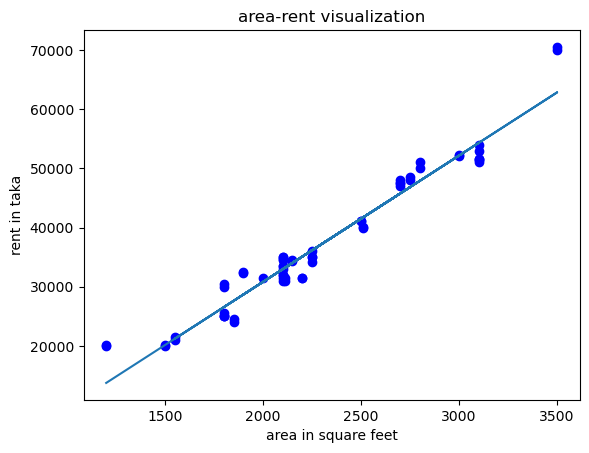

In [82]:
plt.scatter(x, y, color='blue') 
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')
plt.plot(xtest, reg.predict(xtest))

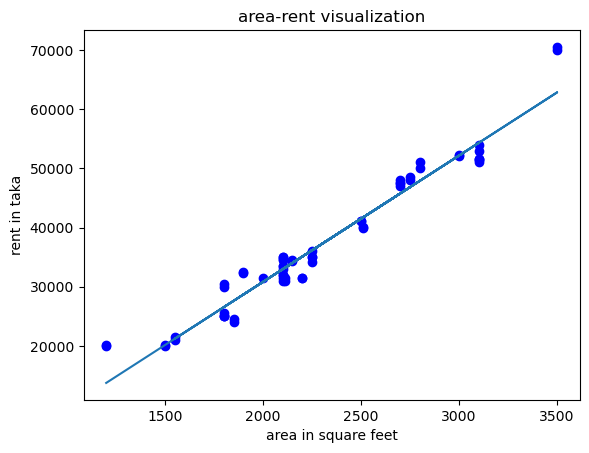

In [83]:
plt.scatter(x, y, color='blue') 
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')
plt.plot(xtest.squeeze(), reg.predict(xtest))